In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score,GridSearchCV,learning_curve,train_test_split,validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv(r'C:\Users\saran\Documents\INEURON\MACHINE_LEARNING\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv')
df.head()
df.drop(['Serial No.'],axis=1,inplace = True)

In [3]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBC3933520>,
      dtype=object)

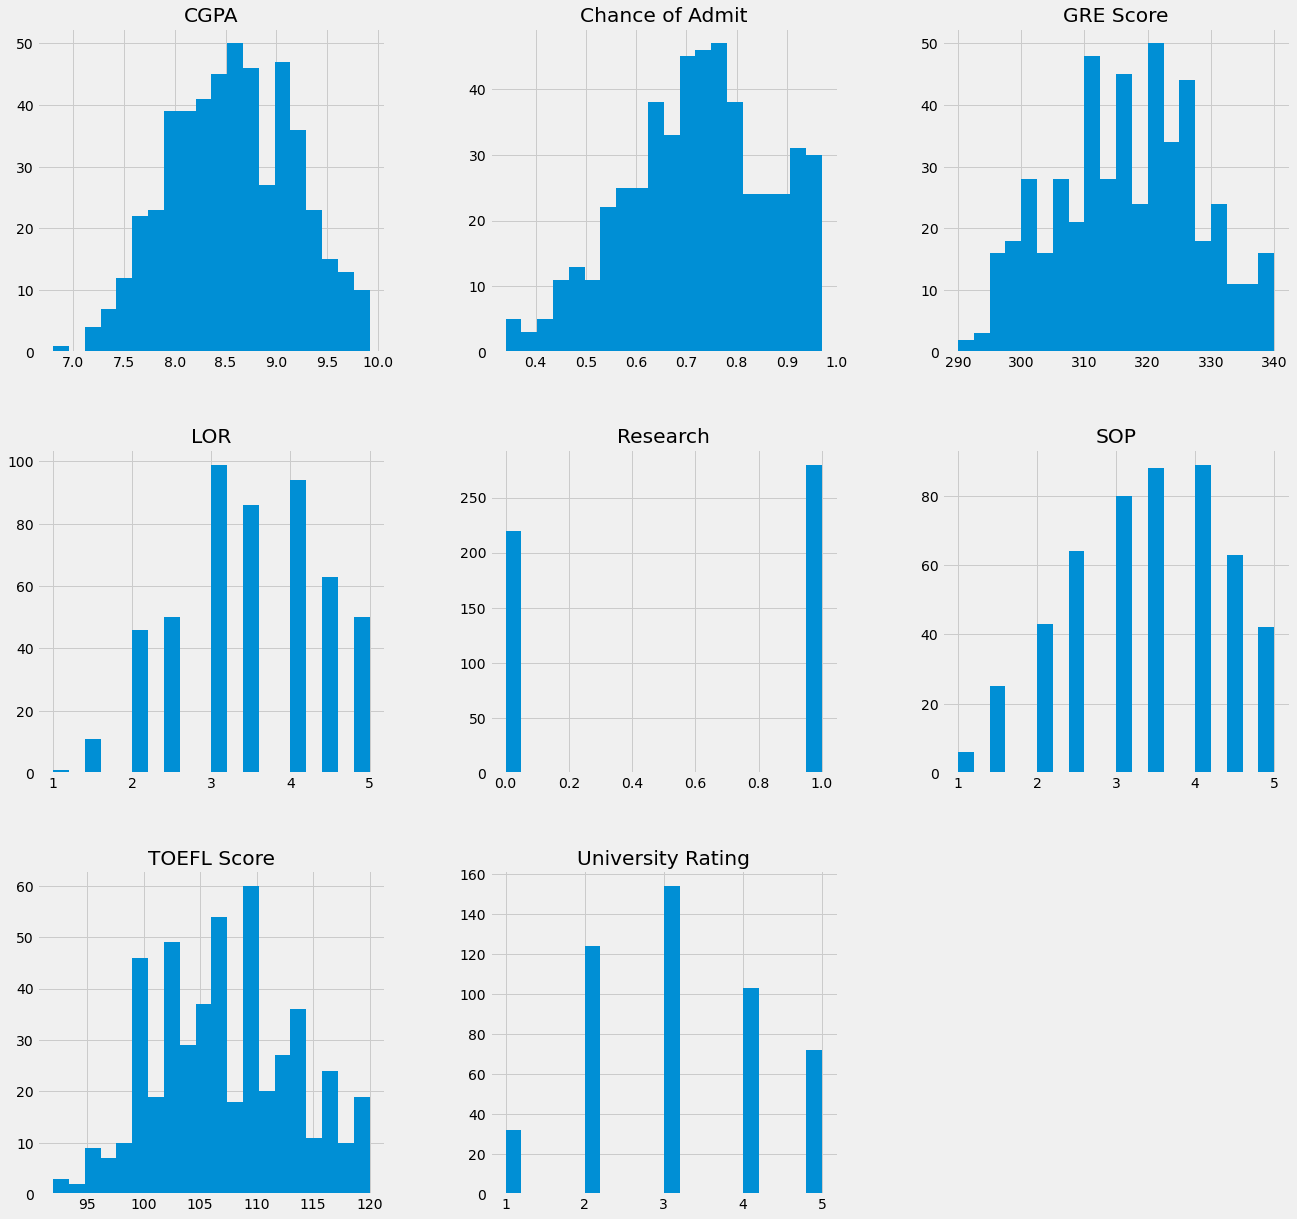

In [4]:
# plottig the  histogram of data before the Cleaning to see the distribution
df.hist(figsize=(20,20),bins=20)

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

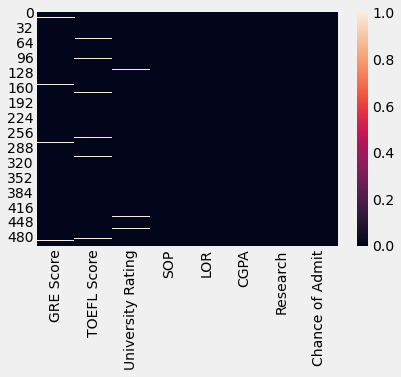

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].median())

df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].median())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

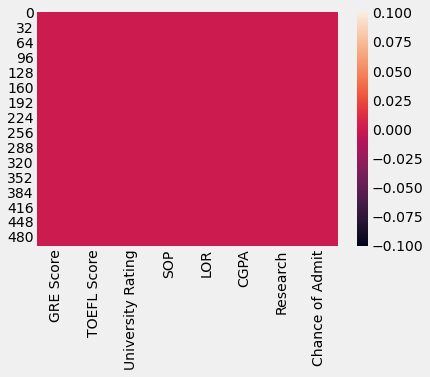

In [9]:
sns.heatmap(df.isnull())

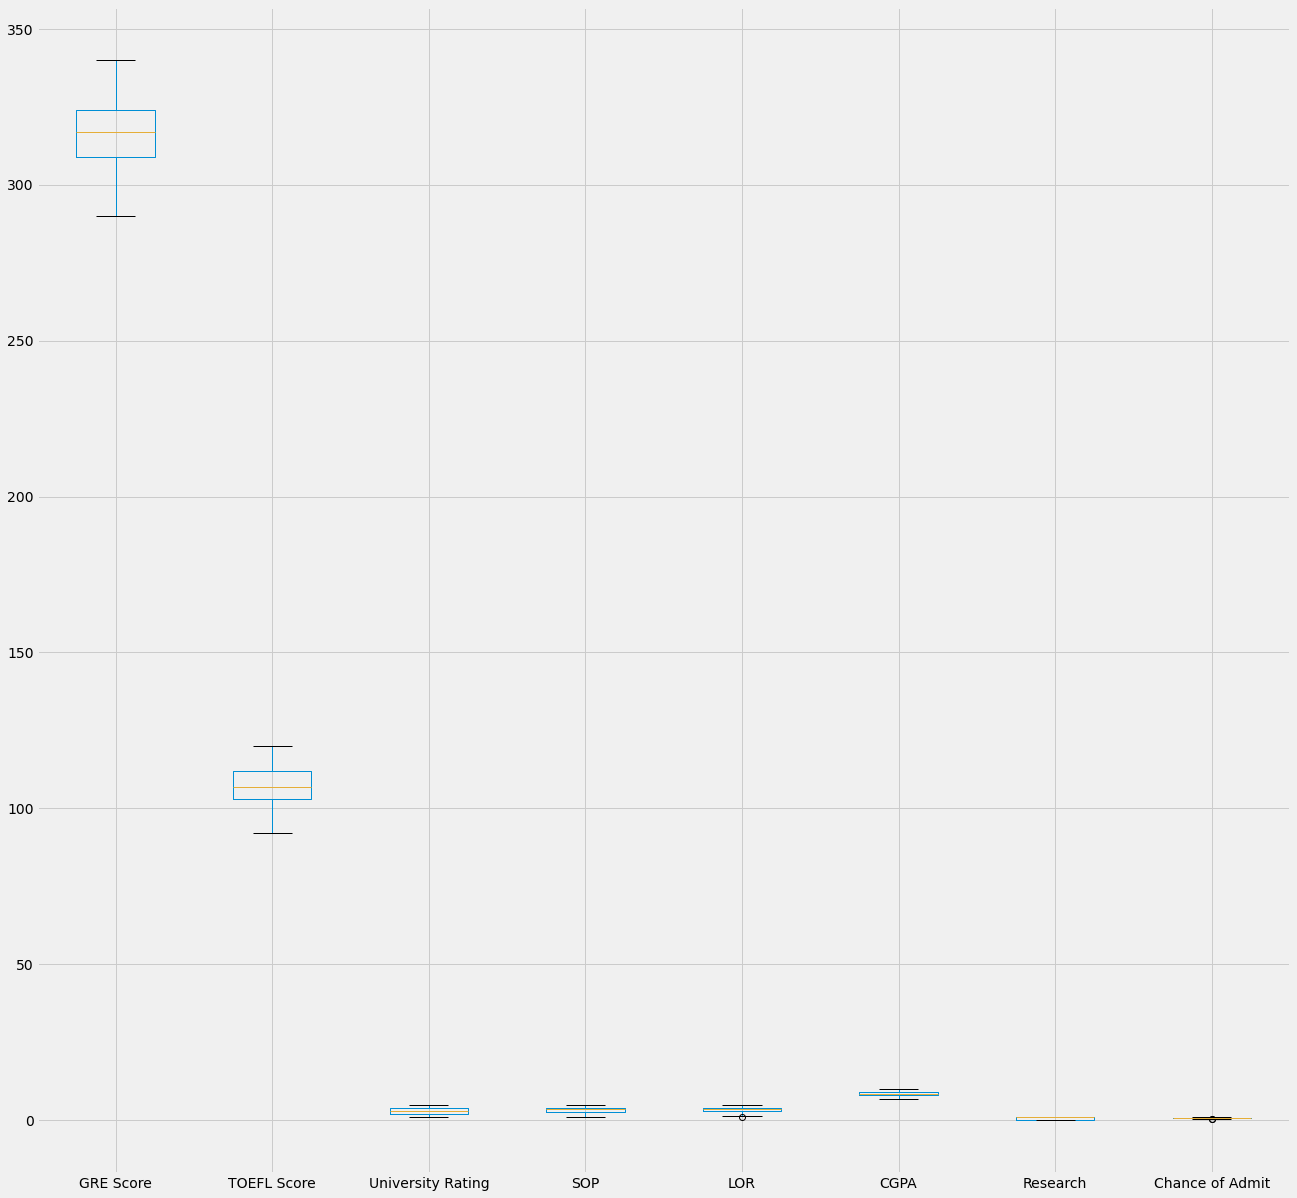

In [10]:
df.plot.box(figsize=(20,20))

In [11]:
# so by boxplot we can see the distribution of data , the all the columns in the different scale
# so we need to scale the data
# first we will find the Graphical & statistical analysis on feature and label column

# Graphical analysis

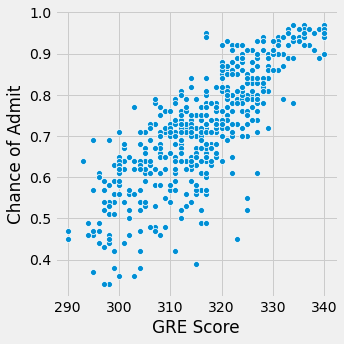

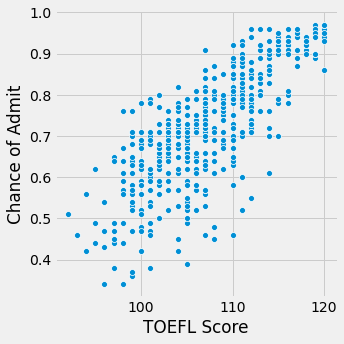

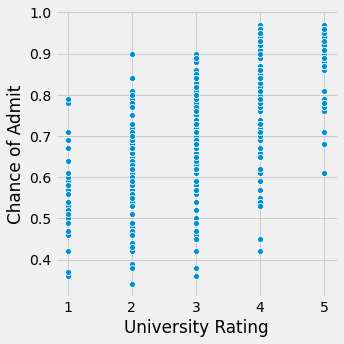

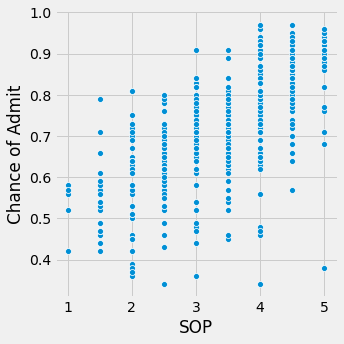

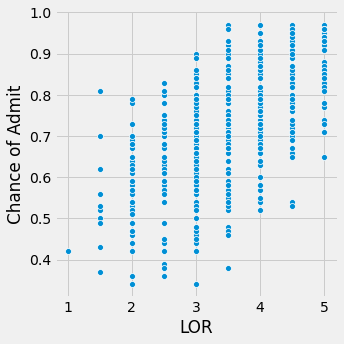

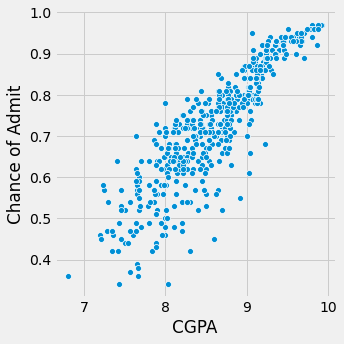

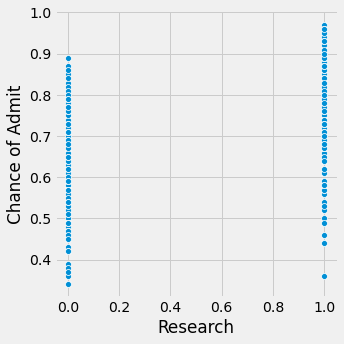

In [12]:
for i in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research']:
    sns.relplot(i,'Chance of Admit',data=df,palette='rainbow')

# statistical analysis

In [13]:
df.rename(columns={'GRE Score':'GRE_SCORE','TOEFL Score':'TOEFL_SCORE','University Rating':'UNIVERSITY_RATING','Chance of Admit':'CHANCE_OF_ADMIT'},inplace=True)


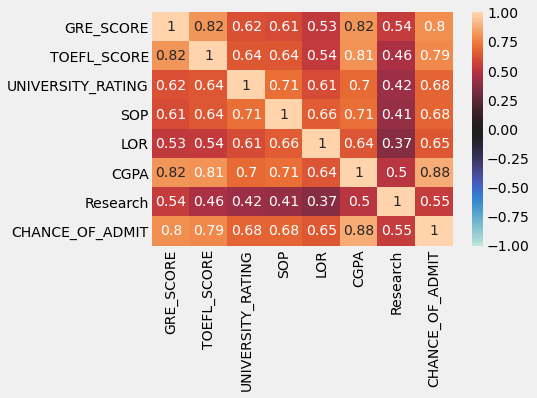

In [14]:
# let't try correlation matrix

sns.heatmap(df.corr(),annot=True,vmin=-1,center=0)

In [15]:
# let's normalize the data
x = df.drop(['CHANCE_OF_ADMIT'],axis=1)
y = df['CHANCE_OF_ADMIT']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x.shape[1]

7

In [17]:
# check the multicollinearty b/w the feature columns by VIF

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,4.154712,GRE_SCORE
1,3.795794,TOEFL_SCORE
2,2.517273,UNIVERSITY_RATING
3,2.776399,SOP
4,2.037378,LOR
5,4.653172,CGPA
6,1.458962,Research


In [18]:
# use train_test_split for model evalution
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=.25,random_state=335)

In [19]:
print('xtrain shape = ',xtrain.shape,'\n')
print('xtest shape = ',xtest.shape,'\n')
print('ytrain shape = ',ytrain.shape,'\n')
print('ytest shape = ',ytest.shape,'\n')

xtrain shape =  (375, 7) 

xtest shape =  (125, 7) 

ytrain shape =  (375,) 

ytest shape =  (125,) 



In [20]:
def model(lr):
    reg = lr.fit(xtrain,ytrain)
    y_train_predict=reg.predict(xtrain)
    y_test_predict=reg.predict(xtest)
    print('\n',lr)
    print('train score = ',reg.score(xtrain,ytrain))
    print('test score = ',reg.score(xtest,ytest))
    print('RMSE of train =', np.sqrt(mean_squared_error(ytrain,y_train_predict)))
    print('RMSE of test =', np.sqrt(mean_squared_error(ytest,y_test_predict)))
    


In [21]:
model(LinearRegression())


 LinearRegression()
train score =  0.8247678606033992
test score =  0.7964685152852055
RMSE of train = 0.06047284900538967
RMSE of test = 0.05866180561523038


In [22]:
model(Ridge())


 Ridge()
train score =  0.8247630469433289
test score =  0.7962398764227052
RMSE of train = 0.06047367959999552
RMSE of test = 0.05869474549162318


In [23]:
def cross_val(lr):
    score = cross_val_score(lr,x_scaled,y,cv=5)
    rmse = cross_val_score(lr,x_scaled,y,cv=5,scoring='neg_root_mean_squared_error')
    print('model cv accuracy = ',np.mean(score))
    print('model cv RMSE = ',np.mean(-rmse))

In [24]:
cross_val(LinearRegression())

model cv accuracy =  0.8087000977987724
model cv RMSE =  0.059811037421392856


In [25]:
cross_val(Ridge())

model cv accuracy =  0.808650089001149
model cv RMSE =  0.05981599862165856


In [26]:
# we will use Ridge model & see the variation of model accuracy on variation of alpha regularization parameter
param =  [-10,0,1,10,30]
train_score,cv_score = validation_curve(Ridge(),x_scaled,y,param_name='alpha',param_range=param,scoring='neg_root_mean_squared_error')

In [32]:
mean_train_error = np.mean(-train_score,axis=1)
mean_test_error = np.mean(-cv_score,axis=1)

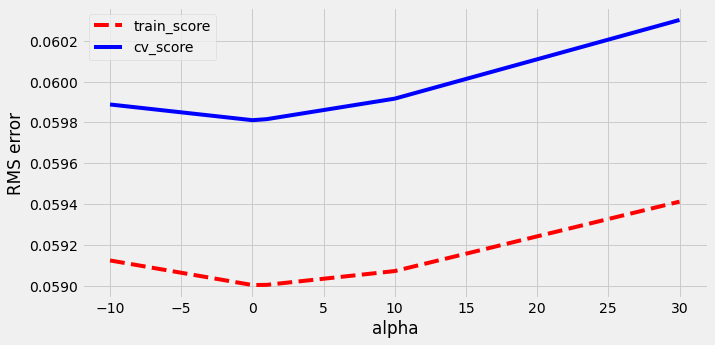

In [34]:
plt.figure(figsize=(10,5))
plt.plot(param,mean_train_error,'r--',label='train_score')
plt.plot(param,mean_test_error,'b',label='cv_score')
plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend()